<a href="https://colab.research.google.com/github/AGU1515/EDIT_QUESTIONS/blob/main/Adi_Gupta_EDIT_ML_INTERN_Technical_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import csv
import pandas as pd
from google.colab import drive
import keras
import cv2
import sklearn
import tensorflow
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Programming/Statistics**

Functional Programming

In [ ]:
example_list = [5.99342831, 4.7234714 , 6.29537708, 8.04605971, 4.53169325, 4.53172609, 8.15842563, 6.53486946, 4.06105123, 6.08512009]

# Write a python/R function that returns the mean, std and number of elements of a python/R list/vector

def basic_stats(list) -> list:
  """
  Outputs the mean, standard deviation, and number of elements in the list as a list in the same order.
  param list: the list that the statistical measures will be derived from
  """
  mean = sum(list) / len(list)
  std = np.std(list)
  return [mean, std, len(list)]


# test

print(basic_stats(example_list))

# This function calculates the mean by taking the sum of all the list values and dividng it by the amount of values in this list(which is what len returns)
# It calculates the std by using the built in std function in the numpy module
# It calculates the amount of items in the list like earlier, simply using len()
# It then returns all the values in a 3-value list.

[5.896122225000001, 1.3718118594538566, 10]


Statistics

In [ ]:
# Given a float array and a supplied "threshold" value, using the function from last problem,
# devise a one-sample z-test that tests to see whether the mean value of the sample exceeds the supplied threshold value.
# Assume the sample level variance matches the population-level variance.
# Suppose the threshold here is four
# Call genes w/a mean expression greater than threshold a bad gene

def hypothesis_test(data: list, threshold):
  """
  Performs a one sample z-test on data to determine whether the mean value exceeds the threshold value, returns False when gene is bad, True when gene is good
  param data: sample to be tested
  param threshold: sample to compare the mean of data to
  """
  # Index into the basic_stats function we made earlier to make our variables - easier to do formulas this way
  mean, std, length = basic_stats(data)[0], basic_stats(data)[1], basic_stats(data)[2]

  # z value is number of SDs a value is from mean of a distribution
  z_value = (mean - threshold) / std

  # p value is statistical significance
  p_value = st.norm.sf(z_value)

  mean = basic_stats(data)[0]
  print(f"Mean: {mean}; Z-value: {z_value}; P-value: {p_value}")
  if mean > threshold:
    return False
  else:
    return True


hypothesis_test(example_list, 4)

# P-value of 0.08 means that the results are not statisically significant.



Mean: 5.896122225000001; Z-value: 1.382202823173494; P-value: 0.08345471675920468


False

OOP

In [ ]:
class Genes:
    def __init__(self, path, threshold):
        self.path = path
        self.threshold = threshold
        self.data = pd.read_csv(path, index_col=0)

    def hypothesis_test(self, data: list, threshold):
        """
        Performs a one sample z-test on data to determine whether the mean value exceeds the threshold value, returns False when gene is bad, True when gene is good
        param data: sample to be tested
        param threshold: sample to compare the mean of data to
        """
        # Index into the basic_stats function we made earlier to make our variables - easier to do formulas this way
        mean, std, length = basic_stats(data)[0], basic_stats(data)[1], basic_stats(data)[2]

        # z value is number of SDs a value is from mean of a distribution
        z_value = (mean - threshold) / std

        # p value is statistical significance
        p_value = st.norm.sf(z_value)

        mean = basic_stats(data)[0]
        print(f"Mean: {mean}; Z-value: {z_value}; P-value: {p_value}")
        if mean > threshold:
            return False
        else:
            return True

    def good_or_bad(self):
        results = []
        for gene, row in self.data.iterrows():  # Iterate through rows (genes)
            is_good = self.hypothesis_test(row.values, self.threshold)  # Call with self
            results.append([gene, is_good])
        return results




data = Genes('drive/MyDrive/EDIT_ML_INTERN_QUESTIONS/1_c_d.csv', 4)

print(data.good_or_bad())



Mean: 4.549052189487719; Z-value: 0.29701457147595706; P-value: 0.3832276922178622
Mean: 3.0177808704679525; Z-value: -1.1348081859890575; P-value: 0.8717721521850472
Mean: 15.706590426773095; Z-value: 0.9096844057135078; P-value: 0.1814944852808521
Mean: -0.580516296153647; Z-value: -1.035459844494586; P-value: 0.8497728949193004
Mean: -0.40261991186433854; Z-value: -0.4322727552592914; P-value: 0.667228406895664
Mean: 3.9364694983606308; Z-value: -0.019794684671123976; P-value: 0.5078964209639909
Mean: 1.5410718031151265; Z-value: -2.8028385658799553; P-value: 0.9974672491166878
Mean: 6.181498873513456; Z-value: 2.2384301984037642; P-value: 0.012596507286905393
[['gene_0', False], ['gene_1', True], ['gene_2', False], ['gene_3', True], ['gene_4', True], ['gene_5', True], ['gene_6', True], ['gene_7', False]]


Plotting

According to Pearson's r-value, there is not a likely chance there's a correlation. 


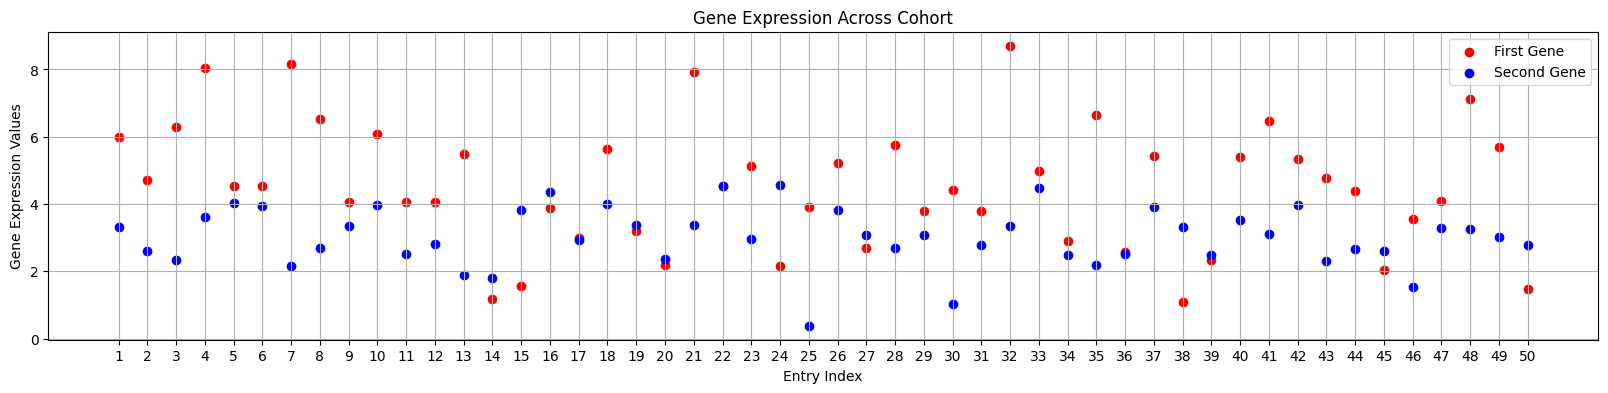

In [ ]:
def plot_gene_expression(gene_1: list, gene_2: list) -> plt:
    """
    Creates a scatter plot with whole numbers on the x-axis and two sets of y-values
    representing the expression values of two genes. Additionally, will return
    if the Pearson's r-value of the two lists represents a correlation or not. The pearson's
    r-value is between -1, and -1. The closer it is to pos 1, the closer it is to a positive
    correlation, and vice versa for -1.

    param gene_1: A list representing expression values of the first gene.
    param gene_2: A list representing expression values of the second gene.
    """
    # find Pearson's r-value
    pearsonRvalue = st.pearsonr(gene_1, gene_2)
    if pearsonRvalue[0] >= 0.9 or pearsonRvalue[0] <= -0.9:
      print("There is a likely chance there's a correlation, according to"
      " Pearson's r-calculations.")
    else:
      print("According to Pearson's r-value, there is not a likely chance"
      " there's a correlation. ")


    num_entries = len(gene_1)  # Number of entries in expression lists
    x_values = list(range(1, num_entries + 1))  # Marks per-entry values

    plt.figure(figsize=(20, 4))
    plt.scatter(x_values, gene_1, color='red', label='First Gene')  # gene_1 values in red
    plt.scatter(x_values, gene_2, color='blue', label='Second Gene')  # gene_2 values in blue

    plt.title("Gene Expression Across Cohort") # set title
    plt.xlabel("Entry Index") # label x
    plt.ylabel("Gene Expression Values") # label y
    plt.xticks(x_values)  # Set x-axis ticks to whole numbers
    plt.legend() # label the two genes
    plt.grid(True) # helps to see alignment/non-alignment
    plt.show()

# plug the first two genes of the data in the function as lists
data = pd.read_csv('drive/MyDrive/EDIT_ML_INTERN_QUESTIONS/1_c_d.csv', index_col=0)

first_gene_data = data.loc['gene_0'].tolist()
second_gene_data = data.loc['gene_1'].tolist()


plot_gene_expression(first_gene_data, second_gene_data)

**2. Bonus**



2c. Deep Learning for Image Classification

In [ ]:
# # Using pytorch, keras, or tensorflow (I will use tf/keras), try to build an image classification pipeline to classify Fashion MNIST

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


model.fit(x_train, y_train, epochs=10)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - accuracy: 0.8121 - loss: 0.7062
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.8904 - loss: 0.3266
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9025 - loss: 0.2705
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 28ms/step - accuracy: 0.9093 - loss: 0.2508
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9111 - loss: 0.2434
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9131 - loss: 0.2383
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9180 - loss: 0.2271
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9188 - loss: 0.2220
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9250 - loss: 0.2070
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9262 - loss: 0.2017
313/313 - 3s - 10ms/step - accuracy: 0.9041 - loss: 0.2778

Test accuracy: 0.9041000008583069


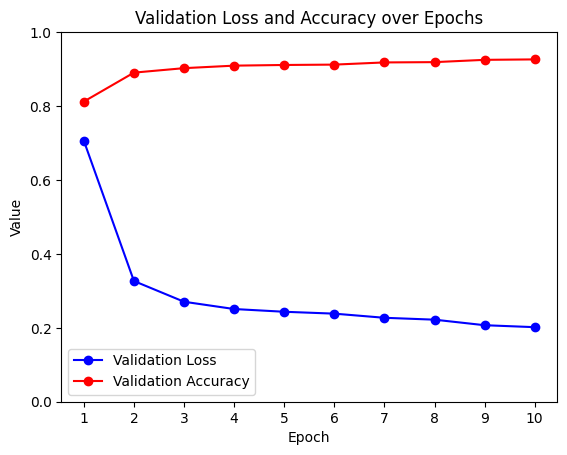

In [ ]:
train_loss = [0.7062, 0.3266, 0.2705, 0.2508, 0.2434, 0.2383, 0.2271, 0.2220, 0.2070, 0.2017]
train_accuracy = [0.8121, 0.8904, 0.9025, 0.9093, 0.9111, 0.9121, 0.9180, 0.9188, 0.9250, 0.9262]


epochs = list(range(1, 11))

fig, ax = plt.subplots()
ax.plot(epochs, train_loss, 'bo-', label='Validation Loss')
ax.plot(epochs, train_accuracy, 'ro-', label='Validation Accuracy')
ax.set_title('Validation Loss and Accuracy over Epochs')
ax.set_xlabel('Epoch')
ax.set_ylabel('Value')
ax.legend()
ax.set_ylim(0, 1)
ax.set_xticks(epochs)
plt.show()
